### Step 1: Import Necessary Libraries

In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import matplotlib's pyplot for creating plots and visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization
import seaborn as sns

# From scikit-learn's model_selection module, import the train_test_split function
# This is used to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# From scikit-learn's linear_model module, import the LinearRegression class
# This will be used to build our linear regression model
from sklearn.linear_model import LinearRegression

# From scikit-learn's preprocessing module, import PolynomialFeatures
# This is used to create polynomial features for the bonus task
from sklearn.preprocessing import PolynomialFeatures

# From scikit-learn's metrics module, import mean_squared_error and r2_score
# These are used to evaluate the performance of our models
from sklearn.metrics import mean_squared_error, r2_score

### **Step 2: Load and Inspect the Dataset**


Here, we load the `StudentPerformanceFactors.csv` file into a pandas DataFrame and perform an initial inspection to understand its structure, data types, and check for any missing values.

In [2]:
# Load the dataset from the specified CSV file into a pandas DataFrame
# The file is named 'StudentPerformanceFactors.csv'
df = pd.read_csv('StudentPerformanceFactors.csv')

# Display the first 5 rows of the DataFrame to get a quick overview of the data
print("First 5 rows of the dataset:")
print(df.head())

# Print a concise summary of the DataFrame
# This includes the index dtype, column dtypes, non-null values, and memory usage
print("\nDataset Info:")
df.info()

# Generate descriptive statistics for the numerical columns in the DataFrame
# This includes count, mean, std, min, 25%, 50%, 75%, and max
print("\nDescriptive Statistics:")
print(df.describe())

# Check for the number of missing (null) values in each column
print("\nMissing Values per Column:")
print(df.isnull().sum())

First 5 rows of the dataset:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teache

## Step 3: Data Cleaning

In [3]:
# Select the relevant columns for our analysis: 'Hours_Studied' and 'Exam_Score'
# Create a new DataFrame with just these columns
data = df[['Hours_Studied', 'Exam_Score']].copy()

# Remove rows that have any missing values in the selected columns
# The .dropna() method removes rows with NaN values. 'inplace=True' modifies the DataFrame directly.
data.dropna(inplace=True)

# Display the shape of the cleaned data (number of rows, number of columns)
# This helps confirm how many data points we have left after cleaning
print("\nShape of the data after cleaning:")
print(data.shape)


Shape of the data after cleaning:
(6607, 2)


### Step 4: Data Visualization

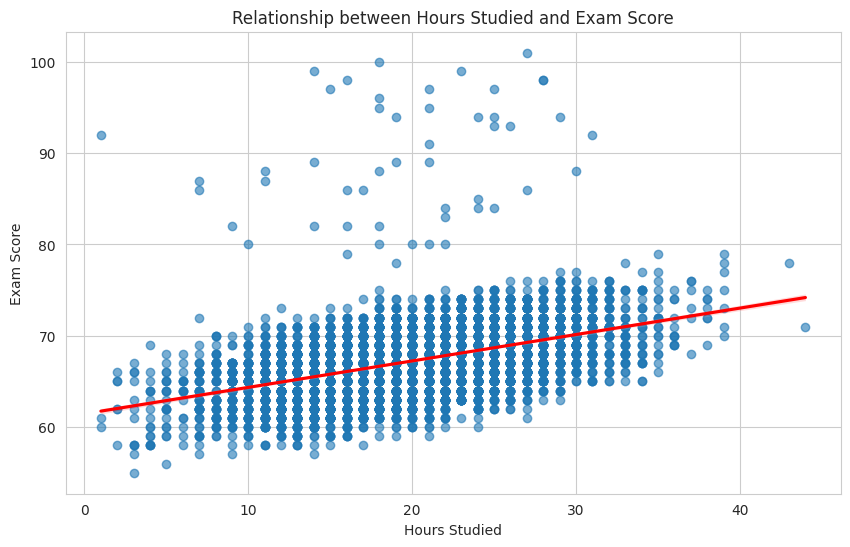

In [4]:
# Set the style of the visualization to 'seaborn-whitegrid' for a clean look
sns.set_style('whitegrid')

# Create a scatter plot to visualize the relationship between Hours_Studied and Exam_Score
# A regression line is automatically added by seaborn's regplot to show the trend
plt.figure(figsize=(10, 6))
sns.regplot(x='Hours_Studied', y='Exam_Score', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Add a title to the plot
plt.title('Relationship between Hours Studied and Exam Score')

# Label the x-axis
plt.xlabel('Hours Studied')

# Label the y-axis
plt.ylabel('Exam Score')

# Display the plot
plt.show()

## Step 5: Prepare Data for Modeling

In [5]:
# Define the feature (independent variable) X.
# We are using 'Hours_Studied' to predict the exam score.
# .values converts the pandas Series to a NumPy array.
# .reshape(-1, 1) converts the 1D array into a 2D array, which is required by scikit-learn.
X = data['Hours_Studied'].values.reshape(-1, 1)

# Define the target (dependent variable) y.
# This is the 'Exam_Score' we want to predict.
y = data['Exam_Score'].values

# Print the shapes of X and y to ensure they are correctly formatted
print("Shape of feature set (X):", X.shape)
print("Shape of target set (y):", y.shape)

Shape of feature set (X): (6607, 1)
Shape of target set (y): (6607,)


## Step 6: Split the Dataset into Training and Testing Sets

In [6]:
# Split the data into training and testing sets
# X_train, y_train: Data used to train the model
# X_test, y_test: Data used to test the model's performance
# test_size=0.2 means that 20% of the data will be used for testing, and 80% for training
# random_state=42 ensures that the split is the same every time the code is run, for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 7: Train a Linear Regression Model

In [7]:
# Create an instance of the LinearRegression model
linear_regressor = LinearRegression()

# Train the model using the training data (X_train and y_train)
# The .fit() method finds the optimal intercept and coefficient for the line
linear_regressor.fit(X_train, y_train)

# Print a confirmation message
print("\nLinear Regression model trained successfully!")


Linear Regression model trained successfully!


## Step 8: Evaluate the Linear Regression Model

In [8]:
# Make predictions on the test data (X_test)
y_pred_linear = linear_regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE)
# This tells us the average squared difference between the actual scores and the predicted scores
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Calculate the R-squared value
# This tells us how much of the variance in exam scores is explained by the hours studied
r2_linear = r2_score(y_test, y_pred_linear)

# Print the performance metrics
print("\nLinear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R-squared (R²): {r2_linear:.2f}")


Linear Regression Model Performance:
Mean Squared Error (MSE): 10.86
R-squared (R²): 0.23


## Step 9: Visualize the Predictions

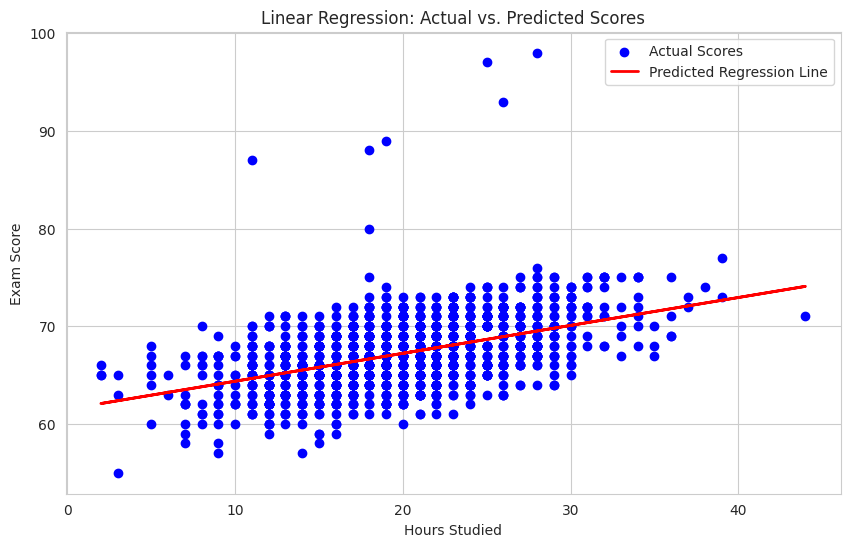

In [9]:
# Create a scatter plot of the actual test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')

# Plot the regression line (predictions) from our model
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Predicted Regression Line')

# Add a title to the plot
plt.title('Linear Regression: Actual vs. Predicted Scores')

# Label the x-axis
plt.xlabel('Hours Studied')

# Label the y-axis
plt.ylabel('Exam Score')

# Add a legend to distinguish between actual and predicted values
plt.legend()

# Display the plot
plt.show()

## Bonus: Polynomial Regression

# --- Bonus: Polynomial Regression ---

In [10]:
# --- Bonus: Polynomial Regression ---

# Step 1: Create polynomial features
# We will transform our feature 'Hours_Studied' into a set of polynomial features of degree 2.
# This means we will have X, and X^2 as our features.
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Step 2: Split the new polynomial data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 3: Train a new linear regression model on the polynomial features
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train_poly)
print("\nPolynomial Regression model trained successfully!")

# Step 4: Evaluate the Polynomial Regression Model
y_pred_poly = poly_regressor.predict(X_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

# Print the performance metrics for the polynomial model
print("\nPolynomial Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"R-squared (R²): {r2_poly:.2f}")


Polynomial Regression model trained successfully!

Polynomial Regression Model Performance:
Mean Squared Error (MSE): 10.84
R-squared (R²): 0.23


## Comparison and Conclusion

In [11]:
# Print a summary comparing the two models
print("\n--- Model Comparison ---")
print(f"Linear Regression R²: {r2_linear:.2f}")
print(f"Polynomial Regression R²: {r2_poly:.2f}")
print("\n")


--- Model Comparison ---
Linear Regression R²: 0.23
Polynomial Regression R²: 0.23


